In [ ]:
"""
Purpose: To Inspect the Autoproofreading Pipeline
and the resultant connectome

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

In [6]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-16 06:25:05,094 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-16 06:25:05,097 - settings - Setting database.user to celiib
INFO - 2021-02-16 06:25:05,098 - settings - Setting database.password to newceliipass
INFO - 2021-02-16 06:25:05,103 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-16 06:25:05,104 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-16 06:25:05,120 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-16 06:25:05,448 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-16 06:25:05,479 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-16 06:25:05,824 - settings - Setting enable_python_native_blobs to True


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu
import datajoint as dj
import neuron_visualizations as nviz
import neuron
import neuron_utils as nru
import proofreading_utils as pru
import classification_utils as clu

In [8]:
len(minnie.AutoProofreadNeurons())

81072

# Getting the current status

In [193]:
curr_table & "status='error'"

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__auto_proofread_neurons2,0b7fd735add8ed4496f652cbc5753a3b,error,=BLOB=,"Exception: Segment ID 864691136577530388 should have been in DecompositionSplit but wasnt with n_error_limbs = 1, n_somas = 1",=BLOB=,celiib@10.28.0.134,at-node7,1,149138,2021-02-16 04:05:59
__auto_proofread_neurons2,25c151f3e4c40ed7862f373232ba3afd,error,=BLOB=,IndexError: index 1 is out of bounds for axis 0 with size 1,=BLOB=,celiib@10.28.0.150,at-node23,1,149244,2021-02-16 04:21:33
__auto_proofread_neurons2,4ecf82d046bf4ee7aea8efa68d3d072d,error,=BLOB=,IndexError: index 1 is out of bounds for axis 0 with size 1,=BLOB=,celiib@10.28.0.165,at-node38,1,149150,2021-02-16 04:20:44
__auto_proofread_neurons2,70246bf0bc643cf5dd226161c5e2bd3e,error,=BLOB=,"Exception: Segment ID 864691136001923786 should have been in DecompositionSplit but wasnt with n_error_limbs = 3, n_somas = 2",=BLOB=,celiib@10.28.0.83,at-compute004,1,149180,2021-02-16 04:00:45
__auto_proofread_neurons2,83926730debc91f604c31b937a614d5a,error,=BLOB=,"Exception: Segment ID 864691136236671759 should have been in DecompositionSplit but wasnt with n_error_limbs = 1, n_somas = 1",=BLOB=,celiib@10.28.0.140,at-node13,1,149310,2021-02-16 04:21:03
__auto_proofread_neurons2,a834c6d1be6c70f35fbab094d8079d2c,error,=BLOB=,"Exception: Segment ID 864691135212746112 should have been in DecompositionSplit but wasnt with n_error_limbs = 3, n_somas = 2",=BLOB=,celiib@10.28.0.146,at-node19,1,149128,2021-02-16 03:59:59
__auto_proofread_neurons2,acdfffef6749dbc4fe9534d326c596fe,error,=BLOB=,"Exception: Segment ID 864691135083934496 should have been in DecompositionSplit but wasnt with n_error_limbs = 1, n_somas = 1",=BLOB=,celiib@10.28.0.83,at-compute004,1,149188,2021-02-16 04:02:59
__auto_proofread_neurons2,b59f03b8e6e351e01d8d7b9fea491077,error,=BLOB=,IndexError: index 1 is out of bounds for axis 0 with size 1,=BLOB=,celiib@10.28.0.145,at-node18,1,149132,2021-02-16 04:09:31
__auto_proofread_neurons2,d010cc89fe41960580434bf6bbb23030,error,=BLOB=,"Exception: Segment ID 864691135994554538 should have been in DecompositionSplit but wasnt with n_error_limbs = 2, n_somas = 1",=BLOB=,celiib@10.28.0.150,at-node23,1,149104,2021-02-16 03:58:21
__auto_proofread_neurons2,d26bf656b3846a10d30abd75a207510c,error,=BLOB=,IndexError: index 1 is out of bounds for axis 0 with size 1,=BLOB=,celiib@10.28.0.129,at-node2,1,149101,2021-02-16 04:18:56


In [194]:
curr_table = (schema.jobs & "table_name='__auto_proofread_neurons2'")
curr_table

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__auto_proofread_neurons2,003bbdaadc20ddd17862d328f1d24f2d,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.146,at-node19,1,149131,2021-02-16 04:22:50
__auto_proofread_neurons2,02cbf8c8057dd3dcaebab06235c1c394,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,1,149086,2021-02-16 04:20:47
__auto_proofread_neurons2,05551c95e64c74284650c215992398ee,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.156,at-node29,1,149099,2021-02-16 04:24:19
__auto_proofread_neurons2,07e933f45c82f4dc2e5aeae456b2f61c,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.165,at-node38,1,149339,2021-02-16 04:20:06
__auto_proofread_neurons2,0a1ecc55092791eb3a3df491d0d9c249,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.143,at-node16,1,149112,2021-02-16 04:22:29
__auto_proofread_neurons2,0a7135725458348eaf86158db8044451,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.148,at-node21,1,149289,2021-02-16 04:22:23
__auto_proofread_neurons2,0b7fd735add8ed4496f652cbc5753a3b,error,=BLOB=,"Exception: Segment ID 864691136577530388 should have been in DecompositionSplit but wasnt with n_error_limbs = 1, n_somas = 1",=BLOB=,celiib@10.28.0.134,at-node7,1,149138,2021-02-16 04:05:59
__auto_proofread_neurons2,0bd215e8e39f4cd1216e5b65185fb030,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.149,at-node22,1,149163,2021-02-16 04:17:36
__auto_proofread_neurons2,0be5eb9f17d05b020216021caa8a7ba5,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.161,at-node34,1,149312,2021-02-16 04:24:09
__auto_proofread_neurons2,0bf60fe19fe369a6003d6ea94c06fab4,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.129,at-node2,1,149102,2021-02-16 04:18:12


In [214]:
len(minnie.AutoProofreadNeurons2()) - 32823

523

In [217]:
minnie.AutoProofreadNeurons2()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134221889045,0,0.25,30.00,5,0,0,1,1,inhibitory,no_spined,0,0,0.0,0.0,565137,911.08,1,1,320238,210586,26743,12705,0,8210,15831,0,0,0,0,1,3,3,

# Getting the Errors

In [9]:
"""
Notes on Error: the decompression error was usually from SIGTERM signal


"""

'\nNotes on Error: the decompression error was usually from SIGTERM signal\n\n\n'

In [12]:
err_table = (schema.jobs & "table_name='__auto_proofread_neurons2'")
err_messages = (err_table).fetch("error_message")
unique_errors,unique_counts = np.unique(err_messages,return_counts=True)
high_frequency_errors = np.where(unique_counts>0)[0]
unique_errors[high_frequency_errors]

array([''], dtype=object)

In [ ]:
new_table = du.restrict_jobs_table_by_error_substring(err_table,
                                         message_in_error="DataJointError: Attempt to insert rows with different fields")
new_table

# Visualizing the Neuron

In [236]:
curr_table

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),axon_faces faces indices that were saved off as belonging to proofread neuron's axon (external storage),axon_on_dendrite_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_on_dendrite_merges_error_length the length (in um) of skeleton distance canceled out by filter,low_branch_clusters_error_area the area (in um ^ 2) of the faces canceled out by filter,low_branch_clusters_error_length the length (in um) of skeleton distance canceled out by filter,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,double_back_and_width_change_error_area the area (in um ^ 2) of the faces canceled out by filter,double_back_and_width_change_error_length the length (in um) of skeleton distance canceled out by filter,crossovers_error_area the area (in um ^ 2) of the faces canceled out by filter,crossovers_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_coordinates_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_coordinates_error_length the length (in um) of skeleton distance canceled out by filter,n_valid_syn_presyn_for_split,n_valid_syn_postsyn_for_split,n_presyn_error_syn_non_axon,n_presyn_error_syn,n_postsyn_error_syn,total_error_synapses,total_presyns,total_postsyns,total_synapses,perc_error_presyn,perc_error_postsyn,overall_percent_error
864691134737851386,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,100.52,52.44,0.0,0.0,0.0,0.0,95.35,26.93,0.0,0.0,0.0,0.0,0,2,6,9,0,9,9,2,11,1.0,0.0,0.8182
864691134832191490,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,1,1,0,1,1,5,6,1.0,0.0,0.1667
864691134832832258,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,46.25,49.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,17,1,1,0,1,2,17,19,0.5,0.0,0.0526
864691134875286778,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,94.16,41.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,1,1,0,1,1.0,nan,1.0
864691134876017402,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,310.61,145.57,0.0,0.0,0.0,0.0,113.46,34.04,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,nan,nan,nan
864691134884742138,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,1181.47,1175.92,0.0,0.0,0.0,0.0,49.94,37.34,0.0,0.0,0.0,0.0,28,109,10,68,0,68,96,109,205,0.7083,0.0,0.3317
864691134884743162,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,68,3,3,0,3,5,68,73,0.6,0.0,0.0411
864691134884743418,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,476.23,533.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,146,8,49,0,49,75,146,221,0.6533,0.0,0.2217
864691134884745466,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,6.69,16.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,103,3,3,0,3,4,103,107,0.75,0.0,0.028
864691134884747514,0,0.25,30.00,0,0,0,1,=BLOB=,=BLOB=,0.0,0.0,0.0,0.0,0.0,0.0,285.72,65.89,0.0,0.0,0.0,0.0,18,37,0,0,1,1,18,38,56,0.0,0.0263,0.0179


In [239]:
curr_table = (minnie.ProofreadStats() & (minnie.AutoProofreadNeurons()
    & "spine_category='densely_spined'").proj())
valid_presyns = (curr_table).fetch("n_valid_syn_presyn_for_split")

valid_presyns_revised = valid_presyns[valid_presyns<np.percentile(valid_presyns,95)]


print(f"total_presyn = {np.sum(valid_presyns_revised)}\n")
print(f"Percentage of no presyn densely_spined = {len(np.where(valid_presyns == 0)[0])/len(curr_table)}")

total_presyn = 1333112

Percentage of no presyn densely_spined = 0.02518828150336925


In [250]:
curr_table = (minnie.AutoProofreadStats2() & (minnie.AutoProofreadNeurons2()
    & "spine_category='densely_spined'").proj())
valid_presyns,presyns_filtered_away = (curr_table).fetch("n_valid_syn_presyn_for_split","n_presyn_error_syn_non_axon")

valid_presyns_revised = valid_presyns[valid_presyns<np.percentile(valid_presyns,95)]
presyns_filtered_away_revised = presyns_filtered_away[presyns_filtered_away<np.percentile(presyns_filtered_away,95)]

print(f"total_presyn = {np.sum(valid_presyns_revised)}\n"
      f"total_filtered_away_presyn = {np.sum(presyns_filtered_away_revised)}")
print(f"Percentage of no presyn densely_spined = {len(np.where(valid_presyns == 0)[0])/len(curr_table)}")

total_presyn = 728525
total_filtered_away_presyn = 447968
Percentage of no presyn densely_spined = 0.4238059407359633


# Seeing how much axon length have on the zero presyn 

Median Axon Length = 28.06194585296248


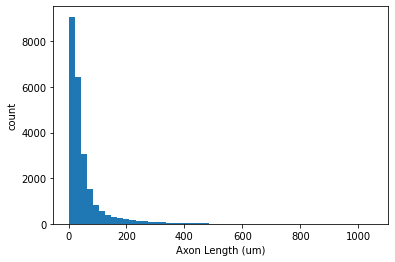

In [251]:
axon_length = (minnie.AutoProofreadNeurons2() & (curr_table & "n_valid_syn_presyn_for_split = 0").proj()).fetch("axon_length")
_ = plt.hist(axon_length,bins=50)
plt.xlabel("Axon Length (um)")
plt.ylabel("count")
print(f"Median Axon Length = {np.median(axon_length)}")

In [222]:
import matplotlib.pyplot as plt

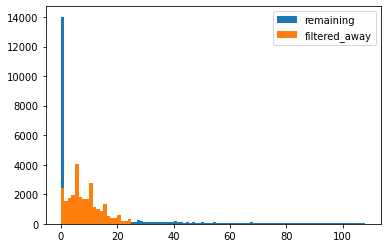

In [233]:
plt.hist(valid_presyns_revised,bins=100,label="remaining")
_ = plt.hist(presyns_filtered_away_revised,bins=20,label="filtered_away")
plt.legend()

In [201]:
(minnie.AutoProofreadNeurons2()
    & "cell_type_predicted='excitatory'"
     & "n_limbs>9")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134940013411,0,0.25,30.00,0,0,0,1,1,excitatory,densely_spined,3,3,161.28677902266685,259.61247572738864,343555,4999.14,2,2,198503,243961,181

In [19]:
# looking at the inhibitory neurons
segment_id=864691136318288094
segment_id=864691136105457369

In [23]:
minnie.AutoProofreadNeurons2() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691136105457369,0,0.25,30.00,3,0,0,1,1,inhibitory,sparsely_spined,0,0,0.0,0.0,296983,608.75,1,1,184598,158671,24042,23450,404,308001,614799,0,0

In [24]:
minnie.AutoProofreadStats2() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),axon_faces faces indices that were saved off as belonging to proofread neuron's axon (external storage),axon_on_dendrite_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_on_dendrite_merges_error_length the length (in um) of skeleton distance canceled out by filter,low_branch_clusters_error_area the area (in um ^ 2) of the faces canceled out by filter,low_branch_clusters_error_length the length (in um) of skeleton distance canceled out by filter,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,double_back_and_width_change_error_area the area (in um ^ 2) of the faces canceled out by filter,double_back_and_width_change_error_length the length (in um) of skeleton distance canceled out by filter,crossovers_error_area the area (in um ^ 2) of the faces canceled out by filter,crossovers_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_coordinates_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_coordinates_error_length the length (in um) of skeleton distance canceled out by filter,n_valid_syn_presyn_for_split,n_valid_syn_postsyn_for_split,n_presyn_error_syn_non_axon,n_presyn_error_syn,n_postsyn_error_syn,total_error_synapses,total_presyns,total_postsyns,total_synapses,perc_error_presyn,perc_error_postsyn,overall_percent_error
864691136105457369,0,0.25,30.00,3,0,0,1,=BLOB=,=BLOB=,nan,nan,0.0,0.0,nan,nan,0.0,0.0,0.0,0.0,505.51,633.36,0,246,384,442,0,442,442,246,688,1.0,0.0,0.6424


In [25]:
neuron_obj = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [32]:
test_neuron = neuron_obj[0][0]
test_neuron

In [30]:
nviz.visualize_neuron(,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [33]:
import classification_utils as clu

In [53]:
new_neuron = pru.filter_away_high_degree_coordinates(

test_neuron,
   return_error_info=False,
   plot_limb_branch_filter_with_disconnect_effect=False,
   plot_limb_branch_filter_away=True,
   plot_final_neuron=True,
    min_degree_to_find=4,
    axon_dependent=False,
    verbose=True
)

min_degree_to_find = 4
curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = [2792, 11466, 19113, 20085]
curr_high_degree_coordinates = [[ 656486.90289459  599433.6731806  1029541.95518035]
 [ 710135.13306645  673921.10412765  977085.92118389]
 [ 740039.16199045  680900.11898185 1035129.6827696 ]
 [ 749169.09024835  691750.31246824  925391.30225095]]
high_degree_branch_groups = [[0, 15, 17, 18], [24, 51, 52, 53], [44, 68, 70, 71], [57, 72, 73, 74]]
For branch group ([0, 15, 17, 18]), the edges to cut were: [array([ 0, 15]), array([ 0, 17]), array([ 0, 18]), array([15, 17]), array([15, 18]), array([17, 18])]
For branch group ([24, 51, 52, 53]), the edges to cut were: [array([24, 51]), array([24, 52]), array([24, 53]), array([51, 52]), array([51, 53]), array([52, 53])]
For branch group ([44, 68, 70, 71]), the edges to cut were: [array([44, 68]), array([44, 70]), array([44, 71]), array([68, 70]), array([68, 71]), array([70, 71])]
For branch group ([57, 72, 73, 74]), the edges t

After disconnecte effect, removed_limb_branch_dict = {'L0': [24, 26, 22, 64, 65, 66, 67, 34, 36, 39, 45, 47, 52, 21, 23, 62, 27, 28, 29, 30, 53, 68, 70, 71, 0, 17, 18, 19, 20, 72, 73, 75, 76, 77, 78, 79, 80, 74], 'L1': [0, 2, 3, 5, 6, 9, 32, 33, 34, 35, 36, 10, 20, 22, 23, 24, 26, 27, 28, 30, 31, 21, 25, 29]}
total_sk_distance = 2166.134703605455, total_area = 2098.9990186501727

 Working on visualization type: mesh


In [66]:
new_neuron = pru.proofread_neuron(test_neuron,
                                  plot_limb_branch_filter_with_disconnect_effect=True,
                                  
                                 )

---- Part A: NOT Attempting to split neuron --------

--- Working on Neuron 0 ---


 ------ Part B: Axon Classification ---- 


Axon Classification = 20.279056549072266


 ------ Part C: Inhibitory Excitatory Classification ---- 


spine_category = sparsely_spined
n_apicals = 1
n_axons = 1
axon_angles = {2: {0: 170.63772801723158}}
Inhibitory Excitatory Classification = 8.583431720733643

 -- Cell Type Classification Results --
inh_exc_class=excitatory
spine_category=sparsely_spined
axon_angles={2: {0: 170.63772801723158}}
n_axons=1
n_apicals=1
neuron_spine_density=0.0002017987768060338
n_branches_processed=27
skeletal_length_processed=2474912.908917489
n_branches_in_search_radius=69
skeletal_length_in_search_radius=3511842.015760704


 ------ Part D: Neuron Filtering ---- 

 

--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}


----------------------- Running F

total_sk_distance = 2662.4391430084524, total_area = 2585.9667483175476
----------------------- FINISHED Running Filter ------------------



 --Filter axon_on_dendrite_merges Results --
local_results = {'axon_on_dendrite_merges_neuron': <neuron.Neuron object at 0x7fa7ef60e2b0>, 'axon_on_dendrite_merges_time': 13.352638483047485, 'axon_on_dendrite_merges_error_area': 2585.9667483175476, 'axon_on_dendrite_merges_error_length': 2662.4391430084524}

--- Working on filter 1:
function = low_branch_clusters
function __name__ = filter_away_low_branch_length_clusters
function arguments = {}


----------------------- Running Filter ------------------
limb_branch_restriction = {'L0': array([6, 9]), 'L1': array([7]), 'L2': array([2, 4])}
--- Working on Limb L0 ---
nodes_to_keep = [6 9]
--- Working on Limb L1 ---
nodes_to_keep = [7]
--- Working on Limb L2 ---
nodes_to_keep = [2 4]
limb_branch_dict was empty so returning original neuron
----------------------- FINISHED Running Filter --------------

total_sk_distance = 234.6256704485825, total_area = 456.9263823093986
----------------------- FINISHED Running Filter ------------------



 --Filter double_back_and_width_change Results --
local_results = {'double_back_and_width_change_neuron': <neuron.Neuron object at 0x7fa7ee4211d0>, 'double_back_and_width_change_time': 13.529723405838013, 'double_back_and_width_change_error_area': 456.9263823093986, 'double_back_and_width_change_error_length': 234.6256704485825}

--- Working on filter 4:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 30}


----------------------- Running Filter ------------------
crossover_coordinates = []

--- Working on Limb L0 ---
edges_to_create = []
edges_to_create = []
crossover_coordinates = []

--- Working on Limb L1 ---
edges_to_create = []
edges_to_create = []
crossover_coordinates = []

--- Working on Limb L2 ---
edges_to_create = []
edges_to_create = []
crossover_coordina

In [105]:
(minnie.AutoProofreadNeurons2
     & "n_limbs>6")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691135012431606,0,0.25,30.00,0,0,0,1,1,excitatory,densely_spined,1,1,1004.468234396758,1241.4625976497844,553798,1205.81,1,1,317897,119324,2425

In [203]:
segment_id = 864691135334548457
split_index = 0
search_key = dict(segment_id=segment_id,split_index=split_index)
search_key

{'segment_id': 864691135334548457, 'split_index': 0}

In [204]:
minnie.AutoProofreadNeurons2() & search_key

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691135334548457,0,0.25,30.00,0,0,0,1,1,excitatory,densely_spined,1,1,2295.078503300045,2315.5243601778875,614746,1380.68,1,1,351022,152923,2270

In [209]:
print("hi")

hi


In [ ]:
# ******************************************************* #

In [210]:
du.plot_proofread_neuron(segment_id=segment_id,
                         split_index=0,
                        plot_nuclei=True,
                         plot_errored_faces=True,
                         plot_synapses=True,
                         plot_paired_nuceli=False,
                         
                         
                         synapse_scatter_size= 0.3,
                         valid_presyn_color="yellow",
                          valid_postsyn_color="aqua",
                          error_presyn_color="black",
                          error_postsyn_color="orange",
                        )

Synapsse Results:
Total Number of Synapses = 655
n_valid_syn_centers_presyn = 87
n_errored_syn_centers_presyn = 240
n_valid_syn_centers_postsyn = 328
n_errored_syn_centers_postsyn = 0
Including axon mesh


In [156]:
import system_utils as su
axon_mesh = su.decompress_pickle("axon_mesh")

In [157]:
nviz.plot_objects(axon_mesh)

In [158]:
du.fetch_segment_id_mesh(segment_id)

<trimesh.Trimesh(vertices.shape=(313553, 3), faces.shape=(624504, 3))>

In [ ]:
mesh_faces = (minnie.AutoProofreadStats2() & dict(segment_id=segment_id,
                                        split_index=split_index)).fetch1("axon_faces")

# Function that will get the axon mesh

In [137]:
du.plot_proofread_neuron(segment_id=segment_id,
                         split_index=0,
                        plot_nuclei=True,
                         plot_errored_faces=True,
                         plot_synapses=True,
                         plot_paired_nuceli=False,
                         plot_error_synapses=True,
                         
                         
                         synapse_scatter_size= 0.4,
                         valid_presyn_color="yellow",
                          valid_postsyn_color="aqua",
                          error_presyn_color="black",
                          error_postsyn_color="orange",
                        )

Synapsse Results:
Total Number of Synapses = 399
n_valid_syn_centers_presyn = 3
n_errored_syn_centers_presyn = 89
n_valid_syn_centers_postsyn = 307
n_errored_syn_centers_postsyn = 0


In [127]:
output_dict = pru.proofreading_table_processing(search_key,
                                               1,
                                               compute_synapse_to_soma_skeletal_distance=True,
                                               verbose=True)



------- AutoProofreadNeuron 864691135454061418  ----------
Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Number of Neurons found = 1
Number of Neurons found =1
Number of Corresponding Nuclei = 1
nucleus_ids = [392156]
nucleus_centers = [[920064 529984 713280]]

-----Working on Neuron Split 0-----

   --> Part A: Proofreading the Neuron ----
---- Part A: NOT Attempting to split neuron --------

--- Working on Neuron 0 ---


 ------ Part B: Axon Classification ---- 


Axon Classification = 14.698306798934937


 ------ Part C: Inhibitory Excitatory Classification ---- 


spine_category = densely_spined
Did not pass final filters to continuing
Inhibitory Excitatory Classification = 6.151429891586304

 -- Cell Type Classification Results --
inh_exc_class=excitatory
spine_category=densely_spined
axon_angles={5: {0: 158.69065202906162}}
n_axons=1
n_apicals=1
neuron_spine_density=0.0008867340300522686
n_branches_processed

curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = [2223]
curr_high_degree_coordinates = [[933603. 538377. 694015.]]
high_degree_branch_groups = [[5, 7, 9, 11]]
branch 5 did not have one of the following in their labels : ['axon', 'axon-like']

--- Working on Limb L1 ---
edges_to_create = []
edges_to_create = []
min_degree_to_find = 4
curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = []
high_degree_branch_groups = []

--- Working on Limb L2 ---
edges_to_create = []
edges_to_create = []
min_degree_to_find = 4
curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = []
high_degree_branch_groups = []

--- Working on Limb L3 ---
edges_to_create = []
edges_to_create = []
min_degree_to_find = 4
curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = []
high_degree_branch_groups = []

--- Working on Limb L4 ---
edges_to_create = []
edges_to_create = []
min_degree_to_find = 4
curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = []
high_

KeyError: 'ver'

In [128]:
debug

> /meshAfterParty/meshAfterParty/proofreading_utils.py(4300)<listcomp>()
   4298 
   4299         keys_to_write = [dict(k,ver=key["ver"])
-> 4300                                      for k in keys_to_write_without_version]
   4301 
   4302 

ipdb> keys_to_write_without_version[0]
*** NameError: name 'keys_to_write_without_version' is not defined
ipdb> u
> /meshAfterParty/meshAfterParty/proofreading_utils.py(4300)proofreading_table_processing()
   4298 
   4299         keys_to_write = [dict(k,ver=key["ver"])
-> 4300                                      for k in keys_to_write_without_version]
   4301 
   4302 

ipdb> keys_to_write_without_version[0]
{'synapse_id': 255161694, 'synapse_type': 'presyn', 'nucleus_id': 392156, 'segment_id': 864691135454061418, 'split_index': 0, 'skeletal_distance_to_soma': 206.79}
ipdb> [k for k in keys_to_write_without_version if k["synapse_type"] == "presyn"]
[{'synapse_id': 255161694, 'synapse_type': 'presyn', 'nucleus_id': 392156, 'segment_id': 8646911354

In [99]:
key["segment_id"]

864691135396389921

In [150]:
neuron_obj = du.decomposition_with_spine_recalculation(search_key["segment_id"],
                                                         search_key["split_index"])

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Number of Neurons found = 1


In [151]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [103]:
pru.proofread_neuron(neuron_obj,
                    plot_limb_branch_filter_with_disconnect_effect=True,
                    verbose=True)

---- Part A: NOT Attempting to split neuron --------

--- Working on Neuron 0 ---


 ------ Part B: Axon Classification ---- 


Axon Classification = 67.46614360809326


 ------ Part C: Inhibitory Excitatory Classification ---- 


spine_category = sparsely_spined
Did not pass final filters to continuing
n_apicals = 0
n_axons = 0
axon_angles = {}
Inhibitory Excitatory Classification = 38.54327893257141

 -- Cell Type Classification Results --
inh_exc_class=inhibitory
spine_category=sparsely_spined
axon_angles={}
n_axons=0
n_apicals=0
neuron_spine_density=0.00022139858624807202
n_branches_processed=43
skeletal_length_processed=3055854.7400007574
n_branches_in_search_radius=91
skeletal_length_in_search_radius=4101491.2873752555


 ------ Part D: Neuron Filtering ---- 

 

--- Working on filter 0:
function = low_branch_clusters
function __name__ = filter_away_low_branch_length_clusters
function arguments = {}


----------------------- Running Filter ------------------
limb_branch_restricti

After edges deleted and created: 
kept_branches= [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
removed_branches = [0, 1]

--- Working on Limb L2 ---

skipping because was not in the limb_edge dict

--- Working on Limb L3 ---

skipping because was not in the limb_edge dict

--- Working on Limb L4 ---

skipping because was not in the limb_edge dict

--- Working on Limb L5 ---

skipping because was not in the limb_edge dict

--- Working on Limb L6 ---

skipping because was not in the limb_edge dict
After disconnecte effect, removed_limb_branch_dict = {'L0': [522, 487, 354, 331, 300, 363, 238, 272, 306, 250, 420, 422, 454, 424, 455, 428, 462, 433, 435, 438, 444, 322, 452, 453, 390, 394, 471, 507, 446, 352, 329, 396, 239, 417, 430, 403, 436, 437, 441, 445, 248, 264, 181, 262, 440, 393, 427, 429, 26, 27, 30, 23], 'L1': [0, 1]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualizati

total_sk_distance = 1666.9266950859728, total_area = 1373.2344710543146
----------------------- FINISHED Running Filter ------------------



 --Filter crossovers Results --
local_results = {'crossovers_neuron': <neuron.Neuron object at 0x7fa942ca46a0>, 'crossovers_time': 147.49901056289673, 'crossovers_error_area': 1373.2344710543146, 'crossovers_error_length': 1666.9266950859728}

--- Working on filter 2:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 130}


----------------------- Running Filter ------------------

--- Working on Limb L0 ---
edges_to_create = []
edges_to_create = []

--- Working on Limb L1 ---
edges_to_create = []
edges_to_create = []

--- Working on Limb L2 ---
edges_to_create = [

total_sk_distance = 6222.322279727789, total_area = 5368.931884459171
----------------------- FINISHED Running Filter ------------------



 --Filter double_back_and_width_change Results --
local_results = {'double_back_and_width_change_neuron': <neuron.Neuron object at 0x7fa9168fb4a8>, 'double_back_and_width_change_time': 262.288635969162, 'double_back_and_width_change_error_area': 5368.931884459171, 'double_back_and_width_change_error_length': 6222.322279727789}

--- Working on filter 3:
function = high_degree_coordinates
function __name__ = filter_away_high_degree_coordinates
function arguments = {'axon_dependent': False, 'min_degree_to_find': 4}


----------------------- Running Filter ------------------
min_degree_to_find = 4
curr_high_degree_nodes for get_nodes_greater_or_equal_degree_k = [5778, 10708, 13609, 73483, 84677, 85117, 92718, 94957, 102698]
curr_high_degree_coordinates = [[654138.20591418 797842.45669947 919578.26242393]
 [668710.55500191 848892.76576785 969020.3074726

total_sk_distance = 1902.0117803540393, total_area = 1763.1438564589964
----------------------- FINISHED Running Filter ------------------



 --Filter high_degree_coordinates Results --
local_results = {'high_degree_coordinates_neuron': <neuron.Neuron object at 0x7fa8e0616400>, 'high_degree_coordinates_time': 69.76572465896606, 'high_degree_coordinates_error_area': 1763.1438564589964, 'high_degree_coordinates_error_length': 1902.0117803540393}



 ---- Total time for applying filter: 480.03711438179016 -----


 ------ Part E: Save Neuron  ---- 

 


Total time for Neuron Proofreading: 586.0487861633301


{'filtered_neuron': <neuron.Neuron at 0x7fa8e0616400>,
 'split_info': {'errored_limbs_area': [],
  'errored_limbs_skeletal_length': [],
  'n_multi_soma_errors': 0,
  'n_same_soma_errors': 0},
 'cell_type_info': {'inh_exc_class': 'inhibitory',
  'spine_category': 'sparsely_spined',
  'axon_angles': {},
  'axon_angle_maximum': 0,
  'n_axons': 0,
  'n_apicals': 0,
  'neuron_spine_density': 0.00022139858624807202,
  'n_branches_processed': 0.00022139858624807202,
  'skeletal_length_processed': 3055854.7400007574,
  'n_branches_in_search_radius': 91,
  'skeletal_length_in_search_radius': 4101491.2873752555},
 'filtering_info': {'low_branch_clusters_neuron': <neuron.Neuron at 0x7fa919b138d0>,
  'low_branch_clusters_time': 0.4816865921020508,
  'low_branch_clusters_error_area': 0,
  'low_branch_clusters_error_length': 0,
  'crossovers_neuron': <neuron.Neuron at 0x7fa942ca46a0>,
  'crossovers_time': 147.49901056289673,
  'crossovers_error_area': 1373.2344710543146,
  'crossovers_error_length':